In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from tensorflow.keras import models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

### Loading Data

In [124]:
# Load the dataset
file_path = "MLE-Assignment.csv"
df = pd.read_csv(file_path)
df

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,imagoai_corn_495,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,...,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839,1200.0
496,imagoai_corn_496,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,...,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733,0.0
497,imagoai_corn_497,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,...,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187,0.0
498,imagoai_corn_498,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,...,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383,0.0


### Data Preprocessing

In [125]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


In [126]:
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values[missing_values > 0])


Missing Values:
 Series([], dtype: int64)


In [127]:
# Summary statistics for numerical columns
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
                 0           1           2           3           4           5  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     0.443118    0.440761    0.433814    0.426122    0.418990    0.412432   
std      0.044719    0.045520    0.045764    0.046070    0.045405    0.044727   
min      0.311182    0.295321    0.284064    0.282054    0.296702    0.286860   
25%      0.410456    0.404310    0.397038    0.389029    0.382102    0.377157   
50%      0.449105    0.442651    0.434215    0.425074    0.417075    0.411872   
75%      0.480245    0.478822    0.473158    0.464947    0.459232    0.452198   
max      0.556287    0.530168    0.528774    0.533202    0.511909    0.501786   

                6           7           8           9  ...         439  \
count  500.000000  500.000000  500.000000  500.000000  ...  500.000000   
mean     0.405868    0.399815    0.394038    0.389664  ...    0.741255   
std      0.044528    0.043

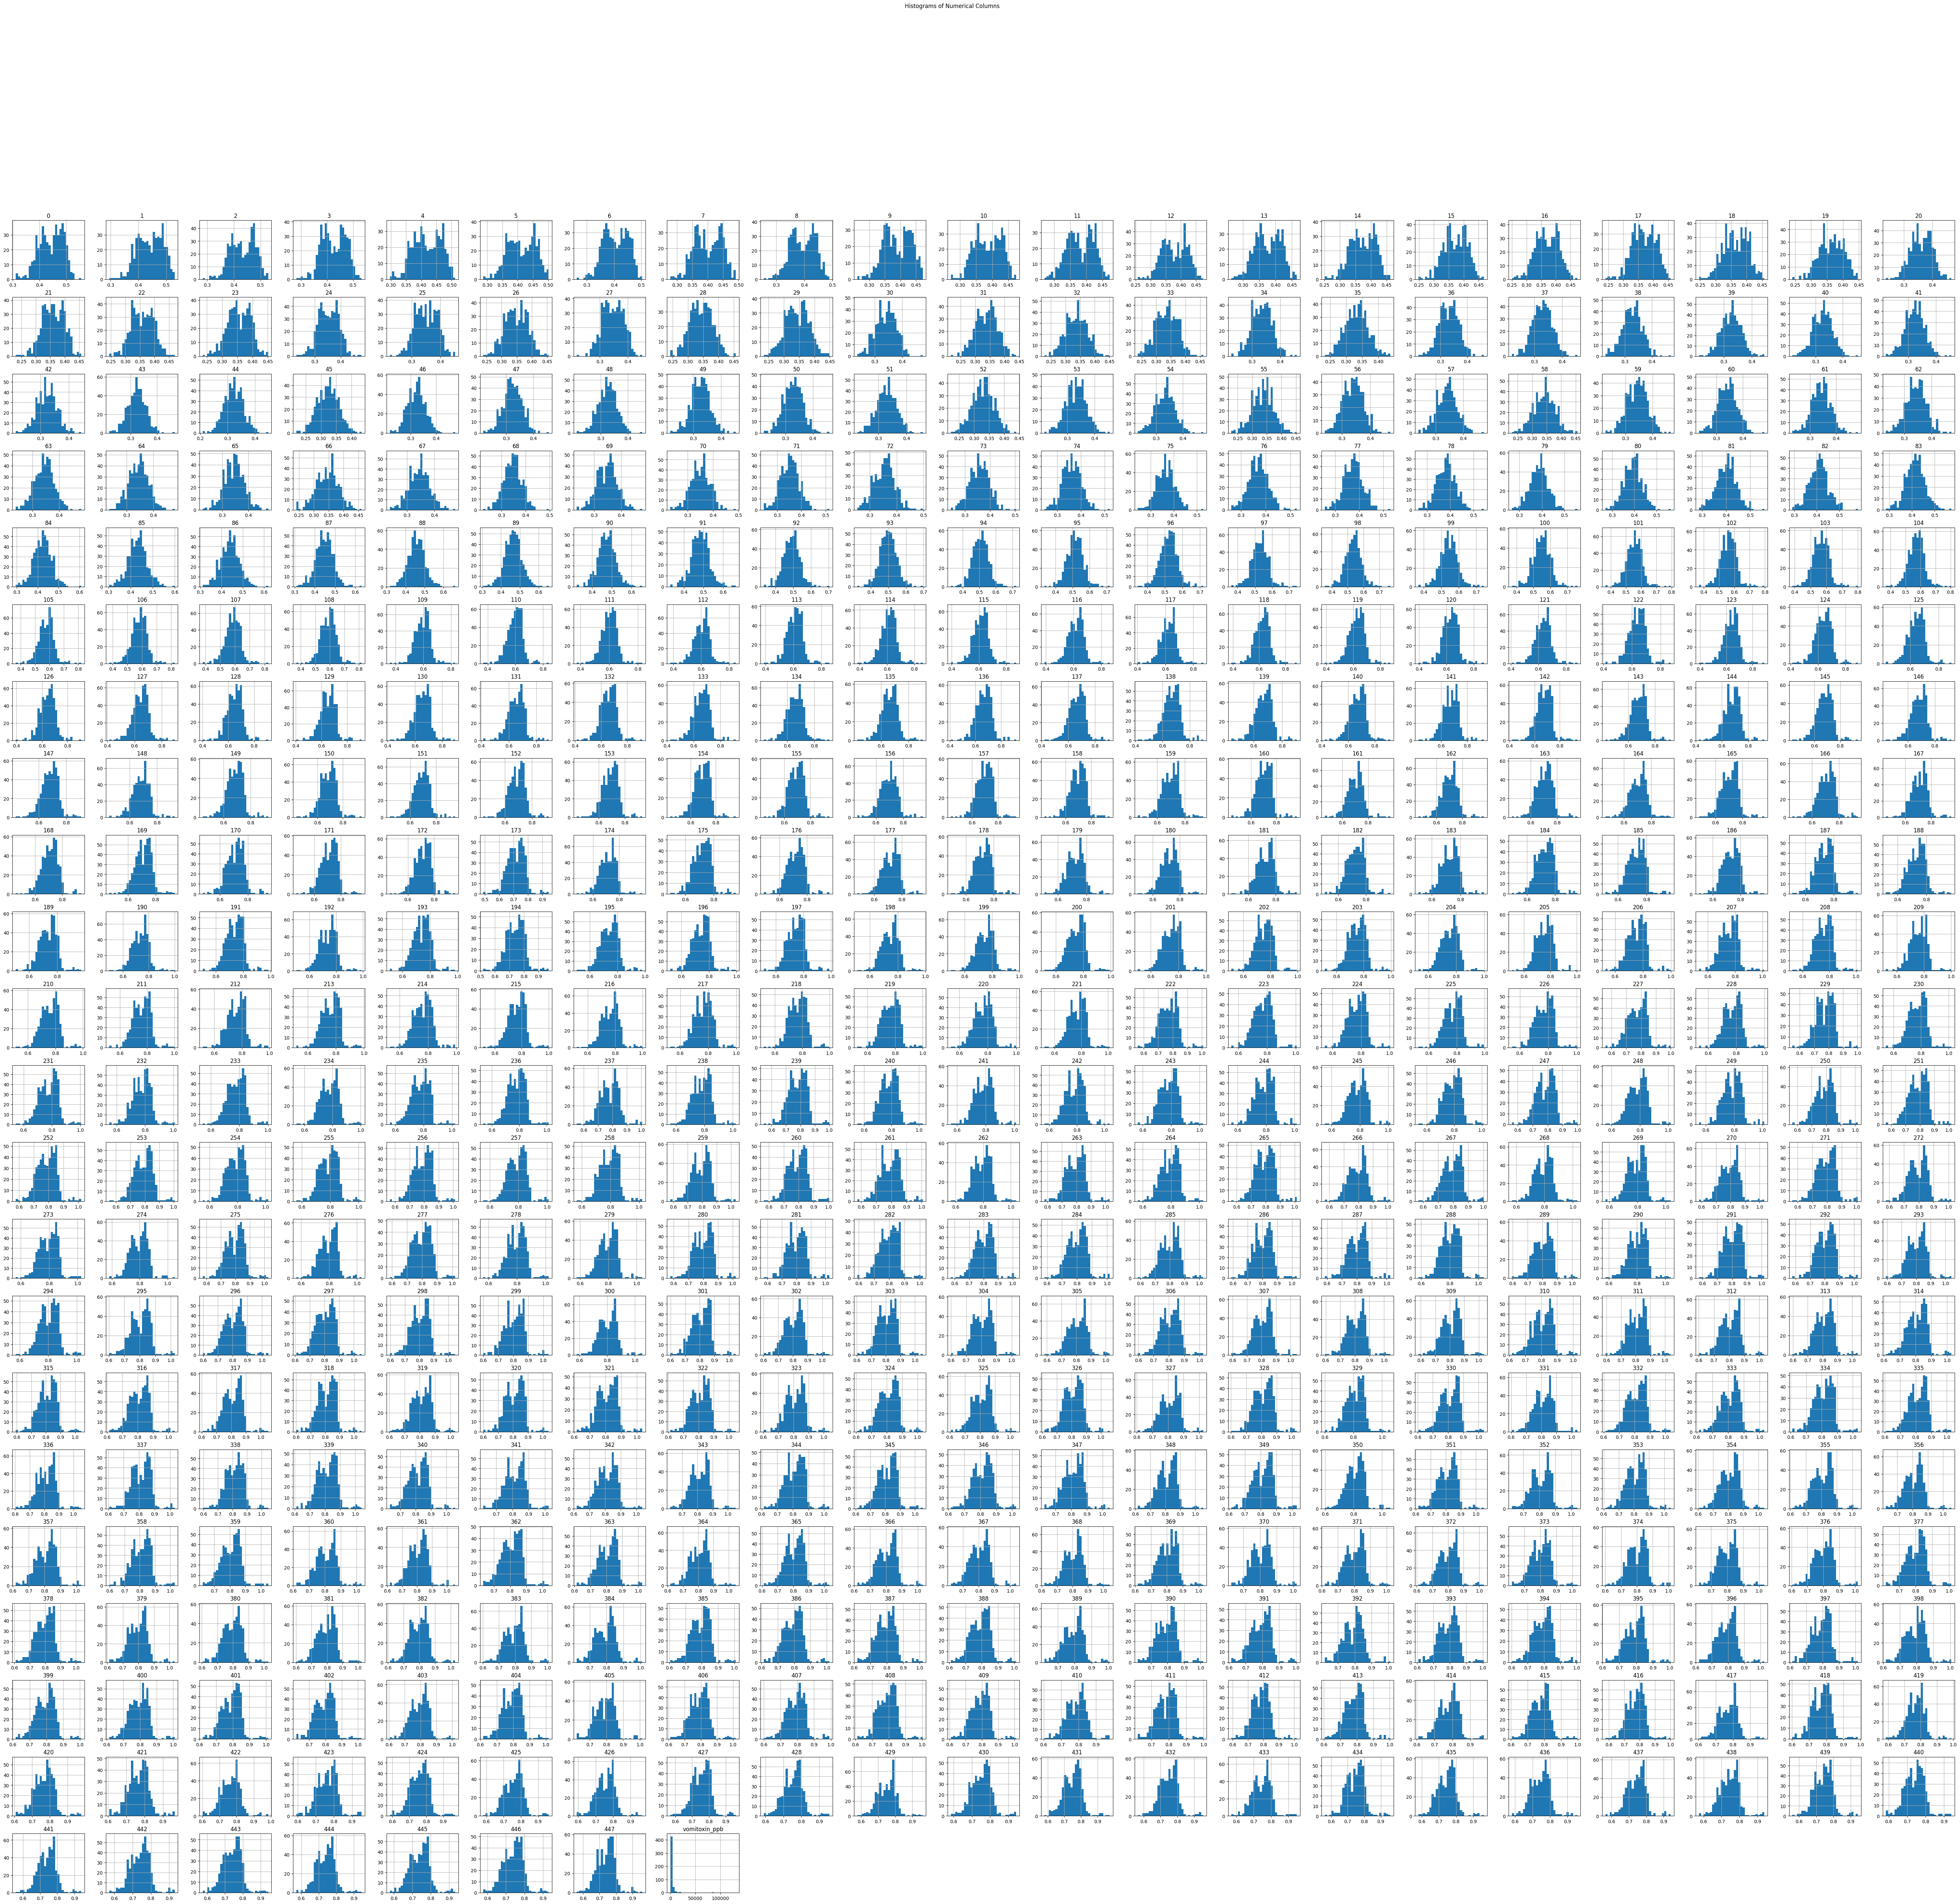

In [128]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[num_cols].hist(figsize=(75, 65), bins=30)
plt.suptitle("Histograms of Numerical Columns")
plt.show()

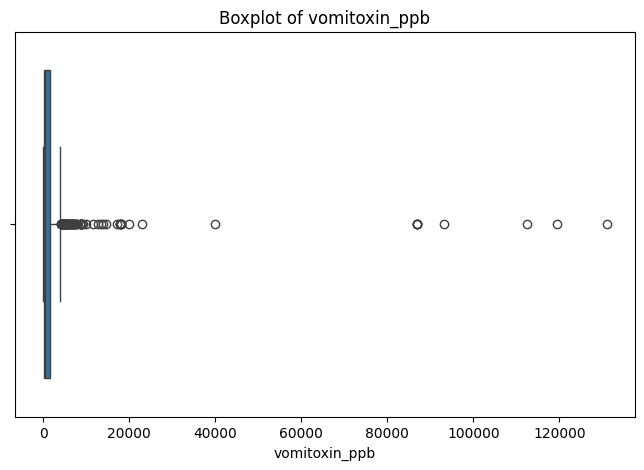

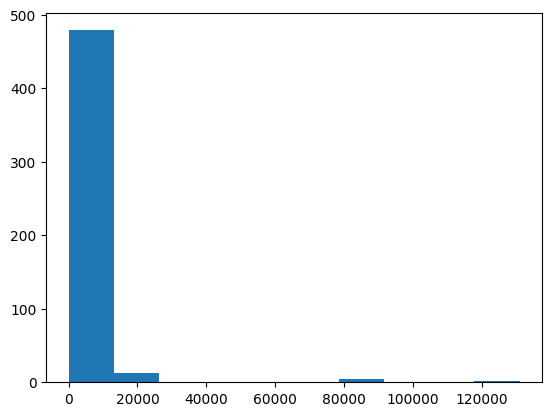

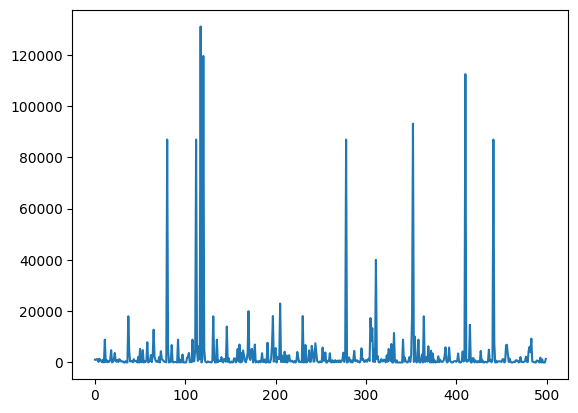

In [129]:
# Detect outliers using boxplot for a specific column (vomitoxin_ppb)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["vomitoxin_ppb"])
plt.title("Boxplot of vomitoxin_ppb")
plt.show()
plt.hist(df["vomitoxin_ppb"])
plt.show()
plt.plot(df["vomitoxin_ppb"])
plt.show()


### Outlier Removal

In [130]:
# Identify outliers using IQR method
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

outliers = detect_outliers(df["vomitoxin_ppb"])
print("\nOutliers in vomitoxin_ppb:\n", outliers)



Outliers in vomitoxin_ppb:
 11      8900.0
18      4800.0
37     18000.0
38      4300.0
50      5300.0
        ...   
455     6700.0
456     6900.0
480     4500.0
481     6100.0
483     9300.0
Name: vomitoxin_ppb, Length: 80, dtype: float64


In [131]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

df = remove_outliers(df, "vomitoxin_ppb")


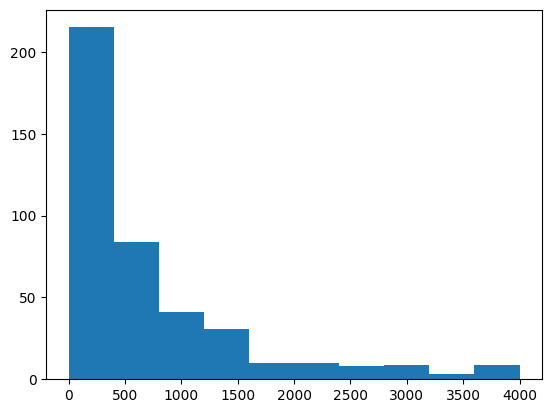

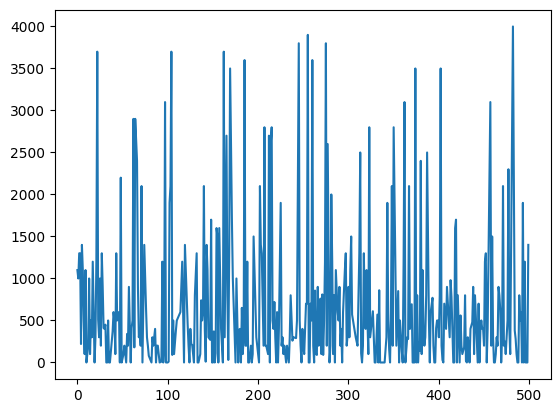

In [132]:
plt.hist(df["vomitoxin_ppb"])
plt.show()
plt.plot(df["vomitoxin_ppb"])
plt.show()


### Anomalies Detection

In [133]:
def remove_anomalies(df, column_name, threshold=3):
    z_scores = np.abs((df[column_name] - df[column_name].mean()) / df[column_name].std())
    return df[z_scores <= threshold]



In [134]:
df = remove_anomalies(df, "vomitoxin_ppb")

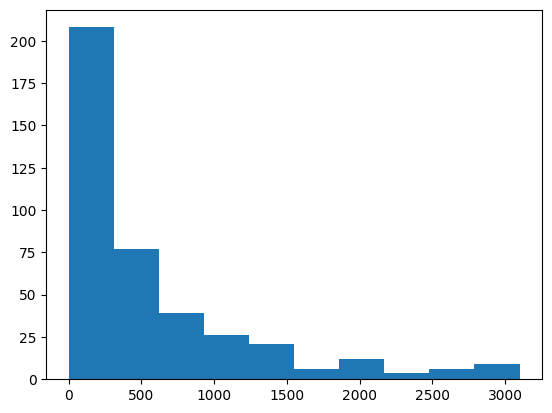

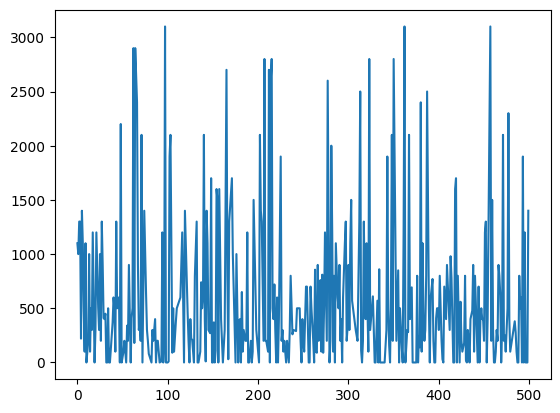

In [135]:
plt.hist(df["vomitoxin_ppb"])
plt.show()
plt.plot(df["vomitoxin_ppb"])
plt.show()

In [136]:
original_target = df.pop("vomitoxin_ppb")


In [137]:
df2 = df.copy()

### Normalization

In [138]:
# Normalize the spectral data
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [139]:
df_cleaned = df.drop(columns=["hsi_id"])
spectral_data = df_cleaned.iloc[:, :-1]

### Avg Reflectance

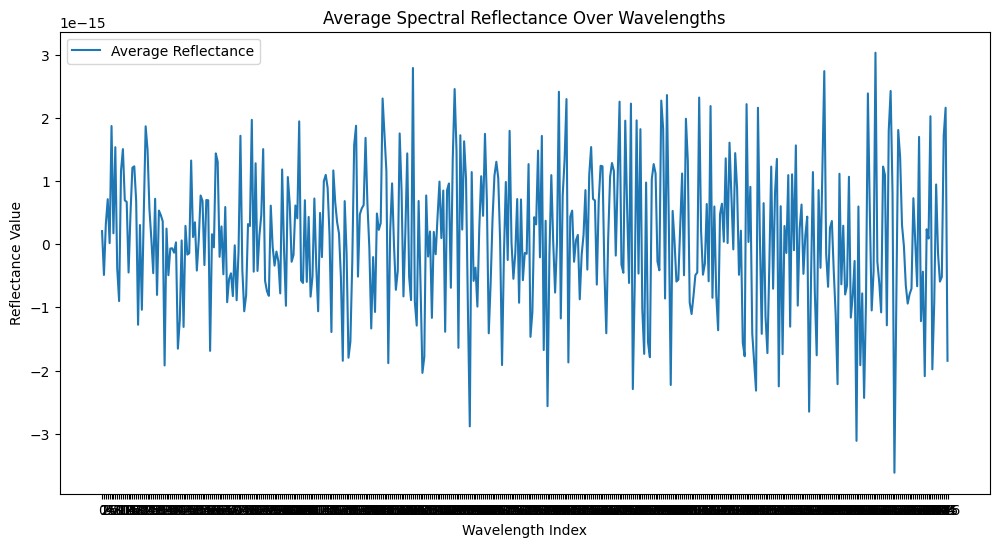

In [140]:
# Plot average reflectance over wavelengths
avg_reflectance = spectral_data.mean(axis=0)
plt.figure(figsize=(12, 6))
plt.plot(avg_reflectance, label="Average Reflectance")
plt.xlabel("Wavelength Index")
plt.ylabel("Reflectance Value")
plt.title("Average Spectral Reflectance Over Wavelengths")
plt.legend()
plt.show()

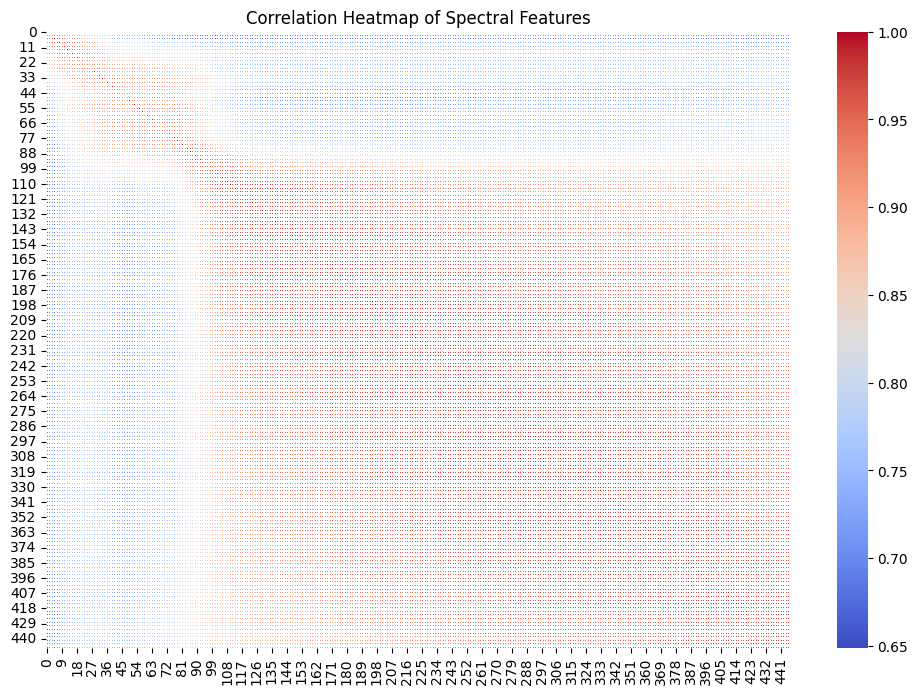

In [141]:
# Heatmap for sample comparisons
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.iloc[:, :-1].corr(), cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Spectral Features")
plt.show()

In [142]:
# Pairplot for a subset of wavelengths and target variable
subset_columns = list(df_cleaned.columns[:5]) + ["vomitoxin_ppb"]
sns.pairplot(df_cleaned[subset_columns])
plt.show()

KeyError: "['vomitoxin_ppb'] not in index"

### Drift Check with mean reflectance

In [49]:
# Sensor Drift Check - Calculate mean reflectance per sample and visualize trends
df_cleaned["mean_reflectance"] = df_cleaned.iloc[:, :-1].mean(axis=1)

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


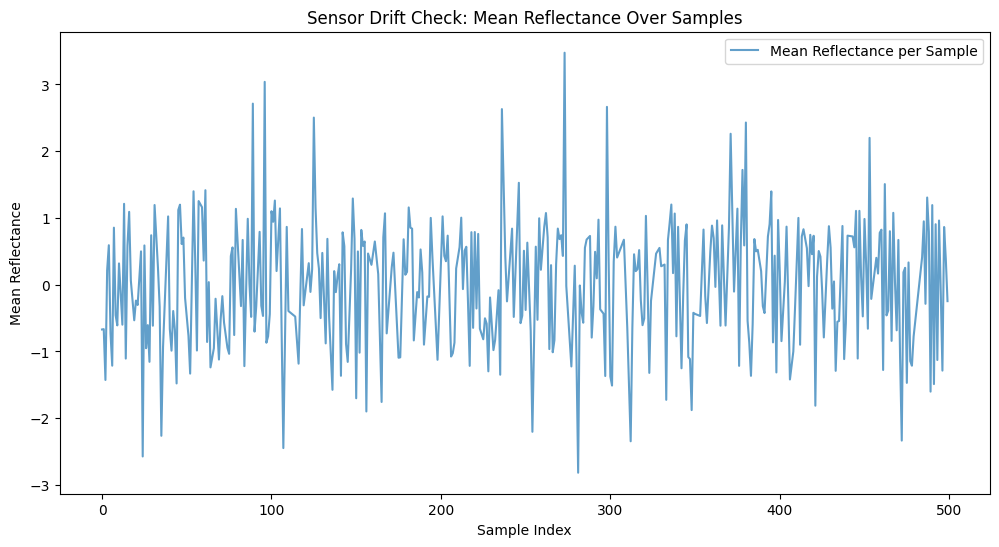

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned["mean_reflectance"], label="Mean Reflectance per Sample", alpha=0.7)
plt.xlabel("Sample Index")
plt.ylabel("Mean Reflectance")
plt.title("Sensor Drift Check: Mean Reflectance Over Samples")
plt.legend()
plt.show()

In [51]:
mean_reflectance = df_cleaned.pop("mean_reflectance")

### Feature optimization using pca

In [52]:
# PCA for detecting inconsistencies
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
pca_result = pca.fit_transform(df_cleaned.iloc[:, :-2])

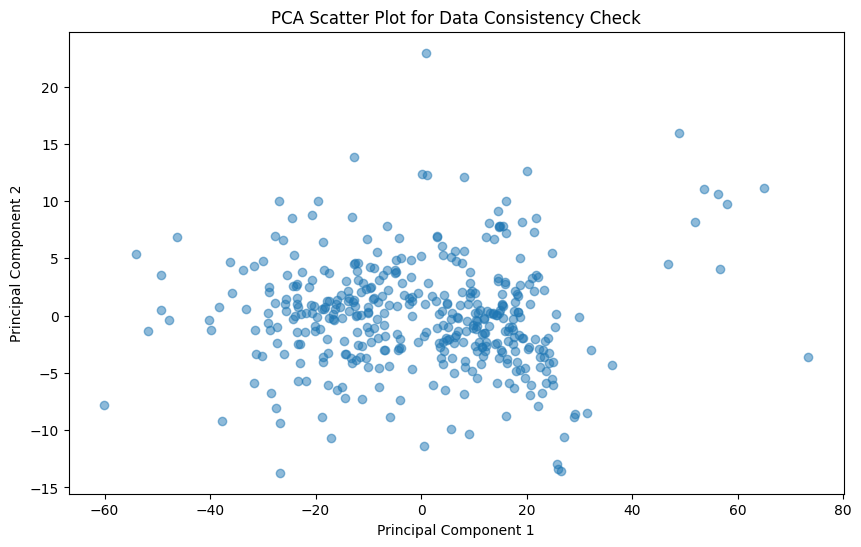

In [143]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot for Data Consistency Check")
plt.show()

In [144]:
# Feature Engineering - Creating Spectral Indices (NDSI = (BandA - BandB) / (BandA + BandB))
df_cleaned["NDSI_1"] = (df_cleaned.iloc[:, 10] - df_cleaned.iloc[:, 20]) / (df_cleaned.iloc[:, 10] + df_cleaned.iloc[:, 20])
df_cleaned["NDSI_2"] = (df_cleaned.iloc[:, 50] - df_cleaned.iloc[:, 100]) / (df_cleaned.iloc[:, 50] + df_cleaned.iloc[:, 100])
df_cleaned["NDSI_3"] = (df_cleaned.iloc[:, 150] - df_cleaned.iloc[:, 200]) / (df_cleaned.iloc[:, 150] + df_cleaned.iloc[:, 200])

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


In [145]:
# Apply PCA for dimensionality reduction and keep 10 principal components
pca = PCA(n_components=50)
pca_features = pca.fit_transform(df_cleaned.iloc[:, :-3])  # Excluding target & new indices

In [146]:
# plt.scatter(df3['PCA_20'], original_target)
# plt.show()

In [147]:
df3 = df_cleaned[["NDSI_1","NDSI_2","NDSI_3"]]
df3

,NDSI_1,NDSI_2,NDSI_3
0,0.369465,-0.358648,-0.194802
1,0.449173,-1.015769,-0.016276
2,-0.120462,-0.159443,0.066038
3,-0.112475,0.024950,0.444147
4,0.354059,0.158579,-0.184133
...,...,...,...
495,1.165314,0.432143,-1.468767
496,0.160702,-0.179151,-0.059739
497,-0.054829,0.273431,0.075406
498,0.224971,-0.088045,0.580599


In [148]:
# Add PCA features to the dataframe
for i in range(50):
    df3[f"PCA_{i+1}"] = pca_features[:, i]

df3


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,NDSI_1,NDSI_2,NDSI_3,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,...,PCA_41,PCA_42,PCA_43,PCA_44,PCA_45,PCA_46,PCA_47,PCA_48,PCA_49,PCA_50
0,0.369465,-0.358648,-0.194802,-14.403704,-3.372888,-1.686263,2.078961,0.364354,0.148406,0.347117,...,-0.146365,-0.200485,-0.735096,0.219618,-0.154184,-0.084399,-0.488694,-0.611530,0.668283,-0.015337
1,0.449173,-1.015769,-0.016276,-14.323479,-3.347943,-0.179084,1.232334,-0.287861,-0.361132,0.047366,...,-0.105249,-0.341774,-0.275675,0.186214,0.010979,0.102912,0.042206,0.078609,-0.650351,-0.072836
2,-0.120462,-0.159443,0.066038,-29.973723,4.790920,4.881001,0.412893,-1.262370,0.035743,0.450076,...,-0.149386,0.725585,0.092080,0.034717,-0.046374,-0.203426,-0.207206,0.582748,0.231149,-0.013687
3,-0.112475,0.024950,0.444147,4.357136,-3.085003,-1.067550,-1.761108,0.665009,0.719323,-0.130912,...,-0.098309,0.155115,-0.173998,-0.168923,-0.008593,-0.152897,-0.567494,0.258901,0.484492,-0.669359
4,0.354059,0.158579,-0.184133,12.526934,0.424567,2.436909,-2.270960,-0.544782,0.164726,0.021194,...,0.444810,-0.428944,-0.339177,0.267984,0.023195,-0.186695,0.050452,-0.260753,-0.055023,0.468725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.165314,0.432143,-1.468767,-1.774103,1.602317,1.561305,-1.651865,0.248335,0.230066,0.134720,...,0.286533,-0.388226,0.047976,-0.552657,0.223590,-0.029139,-0.263250,-0.073271,-0.383524,-0.189114
496,0.160702,-0.179151,-0.059739,-27.453134,-2.387606,-1.385011,0.821411,-1.524890,-0.283610,0.811112,...,-0.284549,0.480306,0.043662,-0.099267,0.904242,-0.064488,0.559483,-0.485387,-0.075425,0.113799
497,-0.054829,0.273431,0.075406,18.332216,0.341753,-0.126979,-2.919461,-0.249603,-0.400841,0.780570,...,-0.102823,-0.444171,-0.341341,-0.136223,0.036730,0.275410,-0.194903,-0.279929,0.436513,0.548723
498,0.224971,-0.088045,0.580599,7.982355,-2.342476,0.121023,-2.460311,0.914722,0.368694,-0.155273,...,0.112206,0.004422,-0.169839,0.287494,-0.392446,0.051606,0.217685,0.034932,0.175473,0.006635


In [149]:
df3

,NDSI_1,NDSI_2,NDSI_3,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,...,PCA_41,PCA_42,PCA_43,PCA_44,PCA_45,PCA_46,PCA_47,PCA_48,PCA_49,PCA_50
0,0.369465,-0.358648,-0.194802,-14.403704,-3.372888,-1.686263,2.078961,0.364354,0.148406,0.347117,...,-0.146365,-0.200485,-0.735096,0.219618,-0.154184,-0.084399,-0.488694,-0.611530,0.668283,-0.015337
1,0.449173,-1.015769,-0.016276,-14.323479,-3.347943,-0.179084,1.232334,-0.287861,-0.361132,0.047366,...,-0.105249,-0.341774,-0.275675,0.186214,0.010979,0.102912,0.042206,0.078609,-0.650351,-0.072836
2,-0.120462,-0.159443,0.066038,-29.973723,4.790920,4.881001,0.412893,-1.262370,0.035743,0.450076,...,-0.149386,0.725585,0.092080,0.034717,-0.046374,-0.203426,-0.207206,0.582748,0.231149,-0.013687
3,-0.112475,0.024950,0.444147,4.357136,-3.085003,-1.067550,-1.761108,0.665009,0.719323,-0.130912,...,-0.098309,0.155115,-0.173998,-0.168923,-0.008593,-0.152897,-0.567494,0.258901,0.484492,-0.669359
4,0.354059,0.158579,-0.184133,12.526934,0.424567,2.436909,-2.270960,-0.544782,0.164726,0.021194,...,0.444810,-0.428944,-0.339177,0.267984,0.023195,-0.186695,0.050452,-0.260753,-0.055023,0.468725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.165314,0.432143,-1.468767,-1.774103,1.602317,1.561305,-1.651865,0.248335,0.230066,0.134720,...,0.286533,-0.388226,0.047976,-0.552657,0.223590,-0.029139,-0.263250,-0.073271,-0.383524,-0.189114
496,0.160702,-0.179151,-0.059739,-27.453134,-2.387606,-1.385011,0.821411,-1.524890,-0.283610,0.811112,...,-0.284549,0.480306,0.043662,-0.099267,0.904242,-0.064488,0.559483,-0.485387,-0.075425,0.113799
497,-0.054829,0.273431,0.075406,18.332216,0.341753,-0.126979,-2.919461,-0.249603,-0.400841,0.780570,...,-0.102823,-0.444171,-0.341341,-0.136223,0.036730,0.275410,-0.194903,-0.279929,0.436513,0.548723
498,0.224971,-0.088045,0.580599,7.982355,-2.342476,0.121023,-2.460311,0.914722,0.368694,-0.155273,...,0.112206,0.004422,-0.169839,0.287494,-0.392446,0.051606,0.217685,0.034932,0.175473,0.006635


In [150]:
# Display updated feature set
df3.shape

(408, 53)

### Train Test Splitting

In [151]:
# Split data into features and target
X = df3.to_numpy()
# scalery = StandardScaler()
# y= scalery.fit_transform(original_target.to_numpy().reshape(-1,1))
y = original_target

In [152]:
y

0      1100.0
1      1000.0
2      1300.0
3      1300.0
4       220.0
        ...  
495    1200.0
496       0.0
497       0.0
498       0.0
499    1400.0
Name: vomitoxin_ppb, Length: 408, dtype: float64

In [153]:
# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [154]:
X_train

array([[ 0.23325283, -0.18321342, -0.04109822, ..., -0.32592529,
        -0.40356665,  0.26510188],
       [-0.11247489,  0.02495039,  0.44414695, ...,  0.2589009 ,
         0.4844923 , -0.6693586 ],
       [ 0.47747783, -0.16609311,  1.35356858, ...,  0.48887789,
        -0.08277293,  0.01098328],
       ...,
       [-0.23829286,  0.57507443, -0.25097582, ..., -0.44916138,
         0.32310258, -0.35873627],
       [ 0.22655346, -0.31375323, -0.252746  , ...,  0.49050347,
        -0.218129  ,  0.2444501 ],
       [-0.15044996, -0.28189575, -0.04190531, ..., -0.14803081,
        -0.19425184, -0.12636697]])

In [155]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return {'MAE': mae, 'RMSE': rmse, 'R²': r2}

### Random Forest

In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# Objective function for Random Forest optimization
def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5)
    }
    
    model = RandomForestRegressor(**params, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    return -scores.mean()

# Run Optuna for Random Forest
study_rf = optuna.create_study(direction='minimize')
study_rf.optimize(objective_rf, n_trials=20)
best_params_rf = study_rf.best_params

# Train the best Random Forest model
rf_model = RandomForestRegressor(**best_params_rf, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
rf_pred = rf_model.predict(X_test)


[I 2025-03-19 03:28:12,969] A new study created in memory with name: no-name-e6403fca-c46a-495e-ba08-f31beef60629
[I 2025-03-19 03:28:17,679] Trial 0 finished with value: 512.1130723297276 and parameters: {'n_estimators': 199, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 0 with value: 512.1130723297276.
[I 2025-03-19 03:28:20,501] Trial 1 finished with value: 509.58793996867615 and parameters: {'n_estimators': 140, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 1 with value: 509.58793996867615.
[I 2025-03-19 03:28:29,602] Trial 2 finished with value: 520.5031048510131 and parameters: {'n_estimators': 358, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is trial 1 with value: 509.58793996867615.
[I 2025-03-19 03:28:33,517] Trial 3 finished with value: 515.3414624910092 and parameters: {'n_estimators': 204, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 1 with value: 5

In [156]:
rf_results = evaluate_model(y_test, rf_pred)
print(rf_results)

{'MAE': 493.3166473636778, 'RMSE': 657.7791092720315, 'R²': 0.03075518905063168}


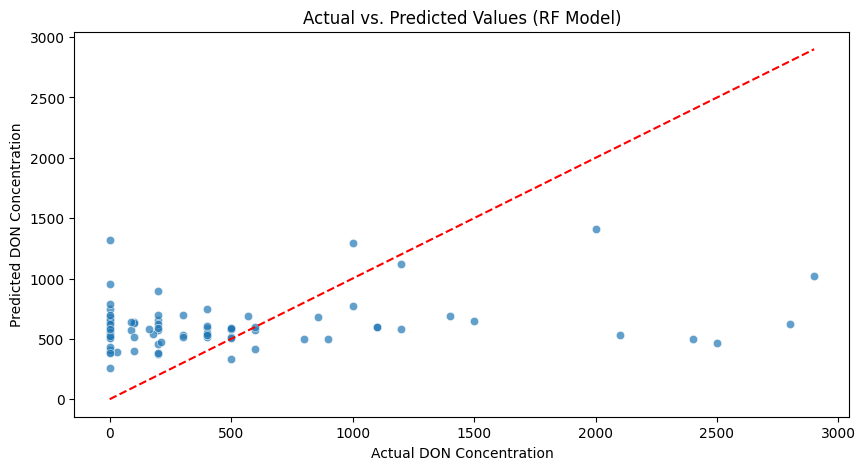

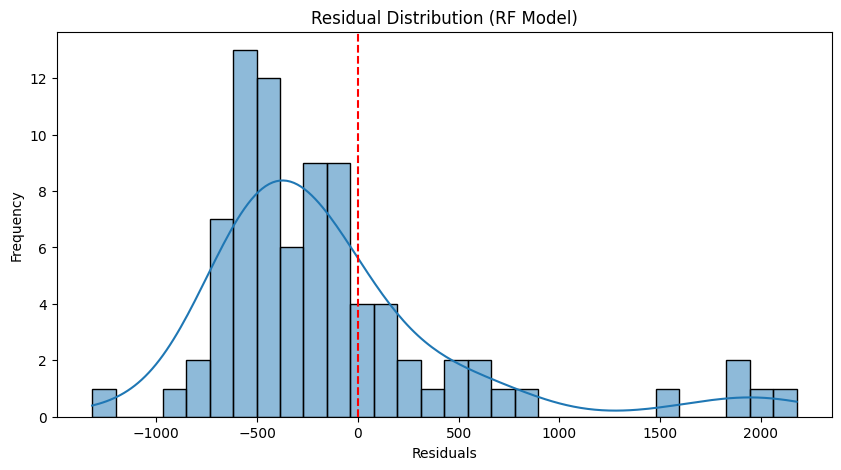

In [157]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=rf_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel("Actual DON Concentration")
plt.ylabel("Predicted DON Concentration")
plt.title("Actual vs. Predicted Values (RF Model)")
plt.show()
# Residual Plot
residuals = y_test - rf_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='r', linestyle='--')  # Zero error line
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution (RF Model)")
plt.show()

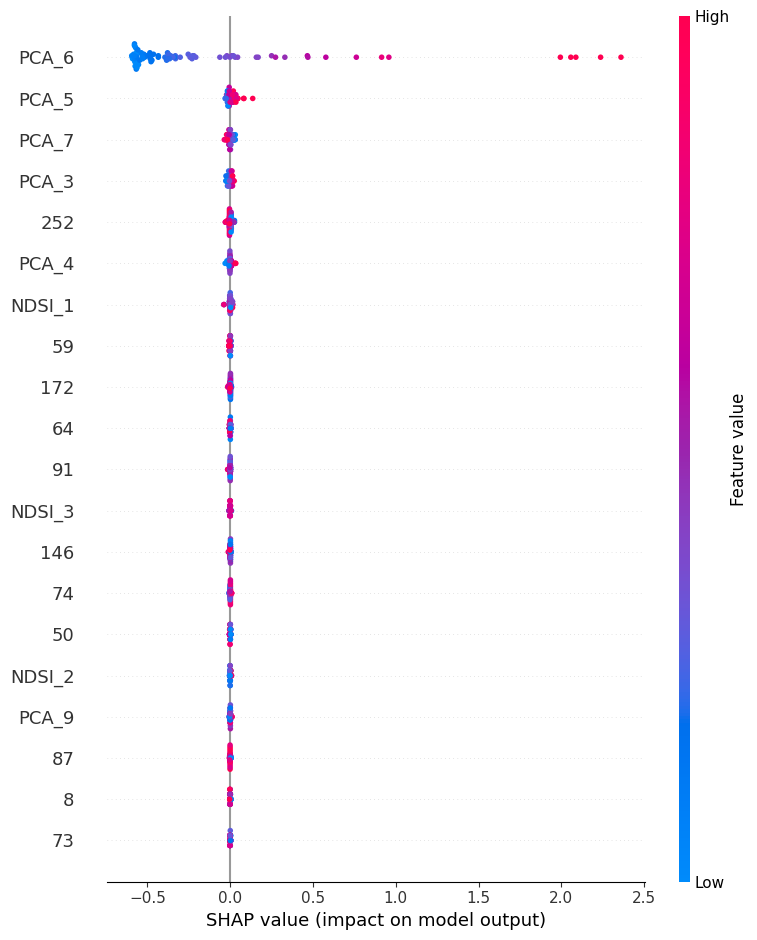

In [34]:
# SHAP for feature importance
explainer = shap.Explainer(rf_model, X_train)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

### XGBoost

In [77]:
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

# Objective function for XGBoost optimization
def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5)
    }

    model = XGBRegressor(**params, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    return -scores.mean()

# Run Optuna for XGBoost
study_xgb = optuna.create_study(direction='minimize')
study_xgb.optimize(objective_xgb, n_trials=20)
best_params_xgb = study_xgb.best_params

# Train the best XGBoost model
xgb_model = XGBRegressor(**best_params_xgb, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and evaluation
xgb_pred = xgb_model.predict(X_test)

# Evaluate performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, xgb_pred)
mse = mean_squared_error(y_test, xgb_pred)
r2 = r2_score(y_test, xgb_pred)

print("XGBoost Performance:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


[I 2025-03-19 03:14:54,576] A new study created in memory with name: no-name-d59bd530-111a-4506-9262-f09a4c0950ce
[I 2025-03-19 03:14:55,277] Trial 0 finished with value: 556.8212319001952 and parameters: {'n_estimators': 252, 'max_depth': 3, 'learning_rate': 0.16553675679701055, 'subsample': 0.6651981301138867, 'colsample_bytree': 0.6061079404613792, 'gamma': 3.633034404563595, 'reg_alpha': 3.7036129210307465, 'reg_lambda': 0.01860472986356665}. Best is trial 0 with value: 556.8212319001952.
[I 2025-03-19 03:14:57,715] Trial 1 finished with value: 532.5646379235185 and parameters: {'n_estimators': 134, 'max_depth': 10, 'learning_rate': 0.15150141410643886, 'subsample': 0.8956023056443563, 'colsample_bytree': 0.7173768127174245, 'gamma': 0.006153475855311674, 'reg_alpha': 1.2147134659421304, 'reg_lambda': 2.1405895185383055}. Best is trial 1 with value: 532.5646379235185.
[I 2025-03-19 03:15:05,304] Trial 2 finished with value: 517.7100685944813 and parameters: {'n_estimators': 396, 'm

XGBoost Performance:
MAE: 493.5514
MSE: 471813.0797
R² Score: -0.0569


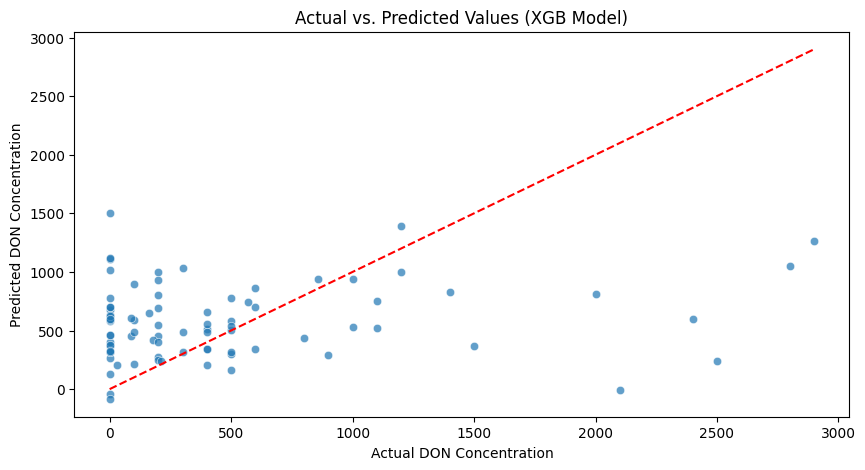

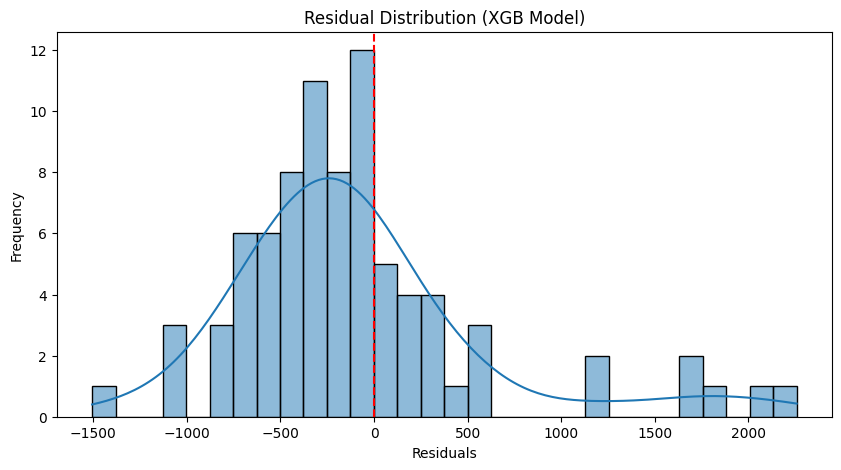

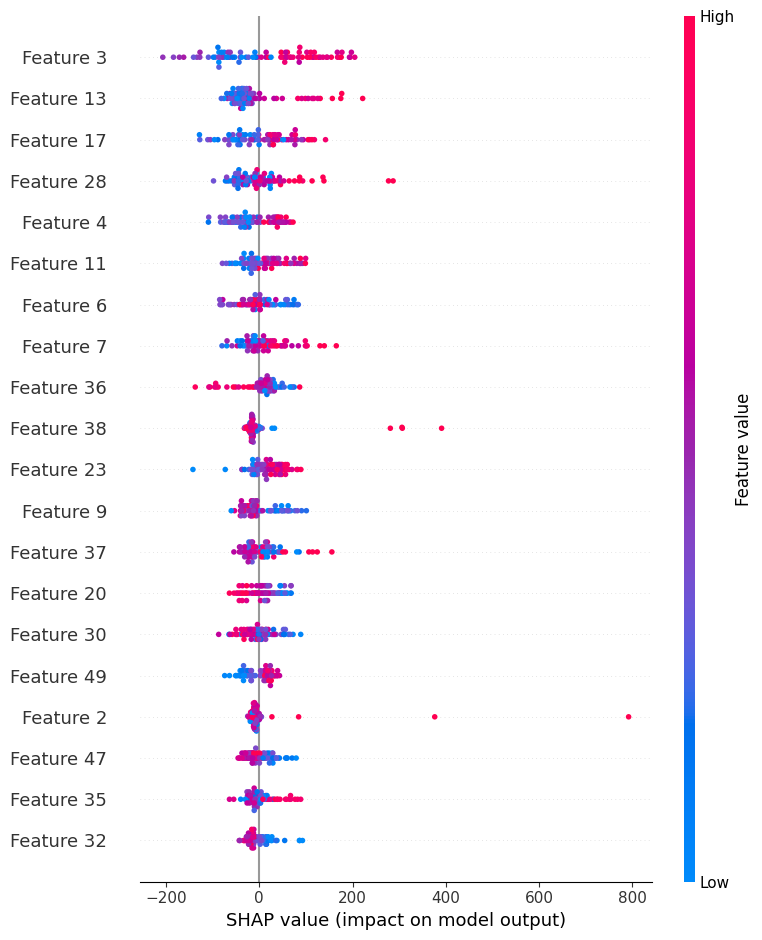

In [116]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=xgb_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel("Actual DON Concentration")
plt.ylabel("Predicted DON Concentration")
plt.title("Actual vs. Predicted Values (XGB Model)")
plt.show()
# Residual Plot
residuals = y_test - xgb_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='r', linestyle='--')  # Zero error line
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution (XGB Model)")
plt.show()

# SHAP for feature importance
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

### Neural Network (Selected)

In [111]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to create ANN model with kwargs
def create_ann(hidden_layers=(64, 32), activation='relu', learning_rate=0.001, **kwargs):
    model = Sequential()
    
    # Input Layer
    model.add(Dense(hidden_layers[0], activation=activation, input_shape=(X_train.shape[1],)))
    
    # Hidden Layers
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation=activation))
    
    # Output Layer
    model.add(Dense(1, activation='linear'))  # Regression output
    
    # Compile Model
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mae'])
    
    return model

# Wrap ANN model for GridSearch
ann_regressor = KerasRegressor(build_fn=create_ann, verbose=0, activation=['relu', 'tanh'],hidden_layers=(64, 32), learning_rate=[0.0001, 0.001, 0.01])

# Define hyperparameter grid
param_grid = {
    'build_fn': [create_ann],  # Add function explicitly
    'hidden_layers': [(64, 32), (128, 64), (256, 128)],  # Different layer configurations
    'activation': ['relu', 'tanh'],  # Activation functions
    'learning_rate': [0.0001, 0.001, 0.01],  # Learning rates
    'epochs': [50, 100],  # Number of training epochs
    'batch_size': [16, 32]  # Batch sizes
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=ann_regressor, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get best parameters
best_params_ann = grid_search.best_params_
print("Best ANN Parameters:", best_params_ann)

# Train ANN model with best parameters
best_ann_model = create_ann(hidden_layers=best_params_ann['hidden_layers'], 
                            activation=best_params_ann['activation'], 
                            learning_rate=best_params_ann['learning_rate'])

history = best_ann_model.fit(X_train, y_train, 
                             epochs=best_params_ann['epochs'], 
                             batch_size=best_params_ann['batch_size'], 
                             validation_data=(X_test, y_test),
                             verbose=2)

# Predictions
ann_pred = best_ann_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, ann_pred)
mse = mean_squared_error(y_test, ann_pred)
r2 = r2_score(y_test, ann_pred)

print("ANN Model Performance:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Fitting 3 folds for each of 72 candidates, totalling 216 fits


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a futu

[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x1079d8940>, epochs=50, hidden_layers=(64, 32), learning_rate=0.001; total time=   2.7s
[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x105a44940>, epochs=50, hidden_layers=(64, 32), learning_rate=0.001; total time=   2.6s
[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x10505c940>, epochs=50, hidden_layers=(64, 32), learning_rate=0.01; total time=   2.6s
[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x104d84940>, epochs=50, hidden_layers=(64, 32), learning_rate=0.0001; total time=   2.7s
[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x103194940>, epochs=50, hidden_layers=(64, 32), learning_rate=0.001; total time=   2.7s
[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x10678c940>, epochs=50, hidden_layers=(64, 32), learning_rate=0.01; total time=   2.4s
[CV] END activation=rel

/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a futu

[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x1680af3a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.001; total time=   2.2s
[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x169cf33a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.0001; total time=   2.3s
[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x16962e3a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.001; total time=   2.3s
[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x1697333a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.001; total time=   2.3s
[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x16aaaf3a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.0001; total time=   2.4s
[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x16ddf33a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.0001; total time=   2.4s
[CV] END acti

/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a futu

[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x1772df3a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.01; total time=   2.3s
[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x169cf33a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.01; total time=   2.5s
[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x1697333a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.0001; total time=   2.6s
[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x1680af3a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.01; total time=   2.8s
[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x16962e3a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.0001; total time=   2.7s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a futu

[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x16aaaf3a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.0001; total time=   2.7s
[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x1772df3a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.001; total time=   2.7s
[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x1699b33a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.001; total time=   3.2s
[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x16ddf33a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.001; total time=   3.3s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x1697333a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.01; total time=   2.2s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x169cf33a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.01; total time=   2.7s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x1680af3a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.01; total time=   2.8s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x16aaaf3a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.0001; total time=   3.4s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x16962e3a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.0001; total time=   3.7s
[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x1772df3a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.0001; total time=   3.5s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x1699b33a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.001; total time=   4.0s
[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x16ddf33a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.001; total time=   3.8s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x169cf33a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.01; total time=   4.2s
[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x1680af3a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.01; total time=   4.1s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x16aaaf3a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.01; total time=   3.7s
[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x1772df3a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.0001; total time=   3.9s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x16962e3a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.0001; total time=   4.1s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x1697333a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.001; total time=   6.5s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x16ddf33a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.001; total time=   4.3s
[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x1699b33a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.0001; total time=   4.5s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x169cf33a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.001; total time=   4.0s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x1680af3a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.001; total time=   4.1s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x1772df3a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.01; total time=   4.0s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x16962e3a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.01; total time=   4.3s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x16aaaf3a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.01; total time=   5.8s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x16ddf33a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.0001; total time=   4.4s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x1699b33a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.0001; total time=   4.6s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x1697333a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.0001; total time=   6.4s
[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x169cf33a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.001; total time=   4.2s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x1699b33a0>, epochs=50, hidden_layers=(64, 32), learning_rate=0.0001; total time=   1.7s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x1772df3a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.001; total time=   4.4s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x16962e3a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.01; total time=   4.4s
[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x1697333a0>, epochs=50, hidden_layers=(64, 32), learning_rate=0.0001; total time=   1.6s
[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x169cf33a0>, epochs=50, hidden_layers=(64, 32), learning_rate=0.0001; total time=   1.6s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x1680af3a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.001; total time=   5.9s
[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x16aaaf3a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.01; total time=   4.1s
[CV] END activation=relu, batch_size=16, build_fn=<function create_ann at 0x16ddf33a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.01; total time=   3.8s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x1699b33a0>, epochs=50, hidden_layers=(64, 32), learning_rate=0.001; total time=   2.1s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x1772df3a0>, epochs=50, hidden_layers=(64, 32), learning_rate=0.001; total time=   1.7s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x16962e3a0>, epochs=50, hidden_layers=(64, 32), learning_rate=0.001; total time=   1.7s
[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x1697333a0>, epochs=50, hidden_layers=(64, 32), learning_rate=0.01; total time=   1.7s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x169cf33a0>, epochs=50, hidden_layers=(64, 32), learning_rate=0.01; total time=   1.9s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x1680af3a0>, epochs=50, hidden_layers=(64, 32), learning_rate=0.01; total time=   1.9s
[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x16ddf33a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.0001; total time=   1.8s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x1699b33a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.0001; total time=   1.5s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x16aaaf3a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.0001; total time=   2.2s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x1772df3a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.001; total time=   2.1s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x16962e3a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.001; total time=   2.0s
[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x1697333a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.001; total time=   2.0s
[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x1680af3a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.01; total time=   1.5s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a futu

[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x169cf33a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.01; total time=   2.0s
[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x16ddf33a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.01; total time=   1.7s


[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x1699b33a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.0001; total time=   1.8s
[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x16aaaf3a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.0001; total time=   1.6s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x1772df3a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.0001; total time=   2.7s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x169cf33a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.01; total time=   2.2s
[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x16962e3a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.001; total time=   2.6s
[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x1697333a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.001; total time=   2.6s
[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x1680af3a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.001; total time=   2.5s
[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x16ddf33a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.01; total time=   2.3s
[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x1699b33a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.01; total time=   2.1s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a futu

[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x16aaaf3a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.0001; total time=   3.0s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x169cf33a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.0001; total time=   2.5s
[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x16962e3a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.001; total time=   2.5s
[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x1699b33a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.01; total time=   2.4s
[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x1772df3a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.0001; total time=   2.8s
[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x1697333a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.001; total time=   2.5s
[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x16ddf33a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.01; total time=   2.5s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a futu

[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x1680af3a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.001; total time=   2.6s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x16aaaf3a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.01; total time=   3.3s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x16962e3a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.0001; total time=   2.7s
[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x1699b33a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.0001; total time=   2.7s
[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x1697333a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.001; total time=   2.7s
[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x169cf33a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.0001; total time=   2.8s
[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x1772df3a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.001; total time=   2.8s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a futu

[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x16ddf33a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.001; total time=   2.8s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x1680af3a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.01; total time=   3.7s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x16aaaf3a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.01; total time=   3.5s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x16962e3a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.01; total time=   3.0s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x1699b33a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.0001; total time=   3.2s
[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x169cf33a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.0001; total time=   3.2s
[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x1697333a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.0001; total time=   3.3s
[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x1772df3a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.001; total time=   3.4s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a futu

[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x16ddf33a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.001; total time=   3.3s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x1680af3a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.001; total time=   3.9s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x1697333a0>, epochs=50, hidden_layers=(64, 32), learning_rate=0.0001; total time=   2.5s
[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x16aaaf3a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.01; total time=   3.4s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x169cf33a0>, epochs=50, hidden_layers=(64, 32), learning_rate=0.0001; total time=   2.7s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a futu

[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x16962e3a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.01; total time=   3.0s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x1772df3a0>, epochs=50, hidden_layers=(64, 32), learning_rate=0.0001; total time=   2.7s
[CV] END activation=relu, batch_size=32, build_fn=<function create_ann at 0x1699b33a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.01; total time=   2.9s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x16ddf33a0>, epochs=50, hidden_layers=(64, 32), learning_rate=0.001; total time=   3.0s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x1680af3a0>, epochs=50, hidden_layers=(64, 32), learning_rate=0.001; total time=   3.1s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x169cf33a0>, epochs=50, hidden_layers=(64, 32), learning_rate=0.01; total time=   2.5s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a futu

[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x1697333a0>, epochs=50, hidden_layers=(64, 32), learning_rate=0.001; total time=   2.7s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x16962e3a0>, epochs=50, hidden_layers=(64, 32), learning_rate=0.01; total time=   2.5s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x1772df3a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.0001; total time=   2.4s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x16aaaf3a0>, epochs=50, hidden_layers=(64, 32), learning_rate=0.01; total time=   2.6s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x1699b33a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.0001; total time=   2.4s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x16ddf33a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.0001; total time=   3.5s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x1680af3a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.001; total time=   2.7s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x1697333a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.001; total time=   2.5s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x1699b33a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.0001; total time=   2.4s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x16aaaf3a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.01; total time=   2.5s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x16962e3a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.01; total time=   2.5s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x1772df3a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.01; total time=   2.5s
[CV] END activati

/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a futu

[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x16ddf33a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.0001; total time=   3.6s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x1680af3a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.0001; total time=   2.8s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x1772df3a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.01; total time=   2.7s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x1699b33a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.001; total time=   2.8s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x169cf33a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.01; total time=   2.7s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x1697333a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.001; total time=   2.8s
[CV] END a

/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a futu

[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x16ddf33a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.0001; total time=   4.1s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x1699b33a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.001; total time=   4.0s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x16aaaf3a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.01; total time=   4.0s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x1772df3a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.0001; total time=   4.1s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x1680af3a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.0001; total time=   4.1s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a futu

[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x1697333a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.01; total time=   4.2s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x16962e3a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.001; total time=   4.3s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x169cf33a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.001; total time=   4.3s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x1680af3a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.001; total time=   4.1s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x169cf33a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.01; total time=   4.0s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x16aaaf3a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.0001; total time=   4.2s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x1772df3a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.0001; total time=   4.2s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x16ddf33a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.01; total time=   4.3s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x1697333a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.001; total time=   4.2s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a futu

[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x1699b33a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.0001; total time=   4.8s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x16962e3a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.001; total time=   6.0s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x1680af3a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.01; total time=   4.3s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x169cf33a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.01; total time=   4.4s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x16aaaf3a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.0001; total time=   4.7s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x16ddf33a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.0001; total time=   4.8s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x1772df3a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.0001; total time=   5.1s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x1697333a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.001; total time=   4.9s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x1699b33a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.001; total time=   4.7s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x16962e3a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.001; total time=   5.5s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x1699b33a0>, epochs=50, hidden_layers=(64, 32), learning_rate=0.001; total time=   2.6s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x1772df3a0>, epochs=50, hidden_layers=(64, 32), learning_rate=0.0001; total time=   2.7s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x1697333a0>, epochs=50, hidden_layers=(64, 32), learning_rate=0.0001; total time=   2.8s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x16ddf33a0>, epochs=50, hidden_layers=(64, 32), learning_rate=0.0001; total time=   3.2s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x169cf33a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.01; total time=   5.3s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x16962e3a0>, epochs=50, hidden_layers=(64, 32), learning_rate=0.001; total time=   2.2s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x1699b33a0>, epochs=50, hidden_layers=(64, 32), learning_rate=0.001; total time=   2.0s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x16ddf33a0>, epochs=50, hidden_layers=(64, 32), learning_rate=0.01; total time=   1.8s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a futu

[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x1772df3a0>, epochs=50, hidden_layers=(64, 32), learning_rate=0.01; total time=   2.2s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x1697333a0>, epochs=50, hidden_layers=(64, 32), learning_rate=0.01; total time=   2.1s
[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x1680af3a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.01; total time=   5.7s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=16, build_fn=<function create_ann at 0x16aaaf3a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.01; total time=   6.0s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x16ddf33a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.001; total time=   1.6s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x169cf33a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.0001; total time=   1.7s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x16962e3a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.0001; total time=   1.7s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x1699b33a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.0001; total time=   1.7s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a futu

[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x1697333a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.001; total time=   1.7s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x1772df3a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.001; total time=   1.7s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x1680af3a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.01; total time=   2.6s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x16aaaf3a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.01; total time=   2.6s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x1699b33a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.0001; total time=   1.8s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x16962e3a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.0001; total time=   1.8s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x169cf33a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.0001; total time=   1.9s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a futu

[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x16ddf33a0>, epochs=50, hidden_layers=(128, 64), learning_rate=0.01; total time=   2.1s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x1697333a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.001; total time=   1.9s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x1772df3a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.001; total time=   1.9s


[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x1680af3a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.001; total time=   2.6s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x1699b33a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.01; total time=   2.0s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x16aaaf3a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.01; total time=   2.1s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x16962e3a0>, epochs=50, hidden_layers=(256, 128), learning_rate=0.01; total time=   2.1s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a futu

[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x169cf33a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.0001; total time=   2.8s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x16ddf33a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.0001; total time=   2.7s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x1697333a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.0001; total time=   2.9s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x1772df3a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.001; total time=   3.2s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x1680af3a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.001; total time=   2.6s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x16962e3a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.01; total time=   2.5s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x1699b33a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.001; total time=   2.6s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x16aaaf3a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.01; total time=   2.6s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a futu

[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x169cf33a0>, epochs=100, hidden_layers=(64, 32), learning_rate=0.01; total time=   2.7s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x16ddf33a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.0001; total time=   2.8s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x1697333a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.0001; total time=   2.6s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x1772df3a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.0001; total time=   2.9s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x16aaaf3a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.01; total time=   3.3s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x16962e3a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.001; total time=   3.4s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x1680af3a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.001; total time=   3.4s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x1699b33a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.001; total time=   3.4s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a futu

[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x169cf33a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.01; total time=   2.9s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x16ddf33a0>, epochs=100, hidden_layers=(128, 64), learning_rate=0.01; total time=   3.0s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x1697333a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.0001; total time=   3.5s


/Users/suhail/Downloads/JajpurExhibits-master/venv/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x1772df3a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.0001; total time=   4.0s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x1680af3a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.001; total time=   3.4s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x16962e3a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.0001; total time=   3.5s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x16aaaf3a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.001; total time=   3.5s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x169cf33a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.01; total time=   3.1s
[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x1699b33a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.001; total time=   3.8s
[CV

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.


[CV] END activation=tanh, batch_size=32, build_fn=<function create_ann at 0x1697333a0>, epochs=100, hidden_layers=(256, 128), learning_rate=0.01; total time=   2.9s


Best ANN Parameters: {'activation': 'relu', 'batch_size': 16, 'build_fn': <function create_ann at 0x344c0dee0>, 'epochs': 100, 'hidden_layers': (64, 32), 'learning_rate': 0.001}
Epoch 1/100
21/21 - 0s - loss: 593.0991 - mae: 593.0991 - val_loss: 476.7567 - val_mae: 476.7567 - 327ms/epoch - 16ms/step
Epoch 2/100
21/21 - 0s - loss: 589.8094 - mae: 589.8094 - val_loss: 474.3220 - val_mae: 474.3220 - 31ms/epoch - 1ms/step
Epoch 3/100
21/21 - 0s - loss: 585.4556 - mae: 585.4556 - val_loss: 470.9078 - val_mae: 470.9078 - 28ms/epoch - 1ms/step
Epoch 4/100
21/21 - 0s - loss: 578.5653 - mae: 578.5653 - val_loss: 464.9650 - val_mae: 464.9650 - 29ms/epoch - 1ms/step
Epoch 5/100
21/21 - 0s - loss: 568.2324 - mae: 568.2324 - val_loss: 456.6978 - val_mae: 456.6978 - 28ms/epoch - 1ms/step
Epoch 6/100
21/21 - 0s - loss: 554.8409 - mae: 554.8409 - val_loss: 447.7189 - val_mae: 447.7189 - 31ms/epoch - 1ms/step
Epoch 7/100
21/21 - 0s - loss: 540.3381 - mae: 540.3381 - val_loss: 442.7263 - val_mae: 442.72

In [112]:
best_ann_model.save('best_ann_model.h5')
print(f"Model saved at best_ann_model.h5")

Model saved at best_ann_model.h5


You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


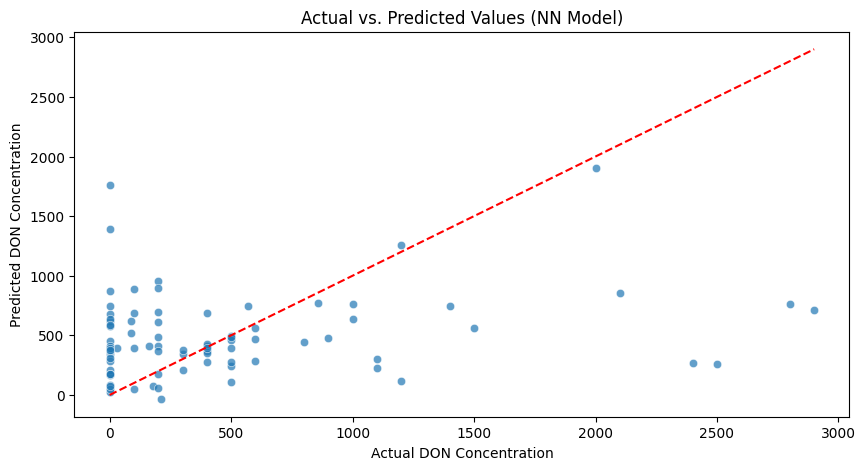

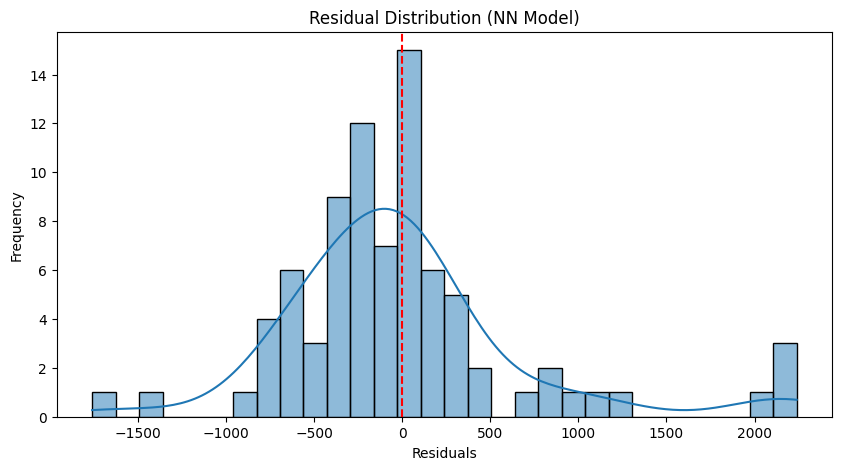

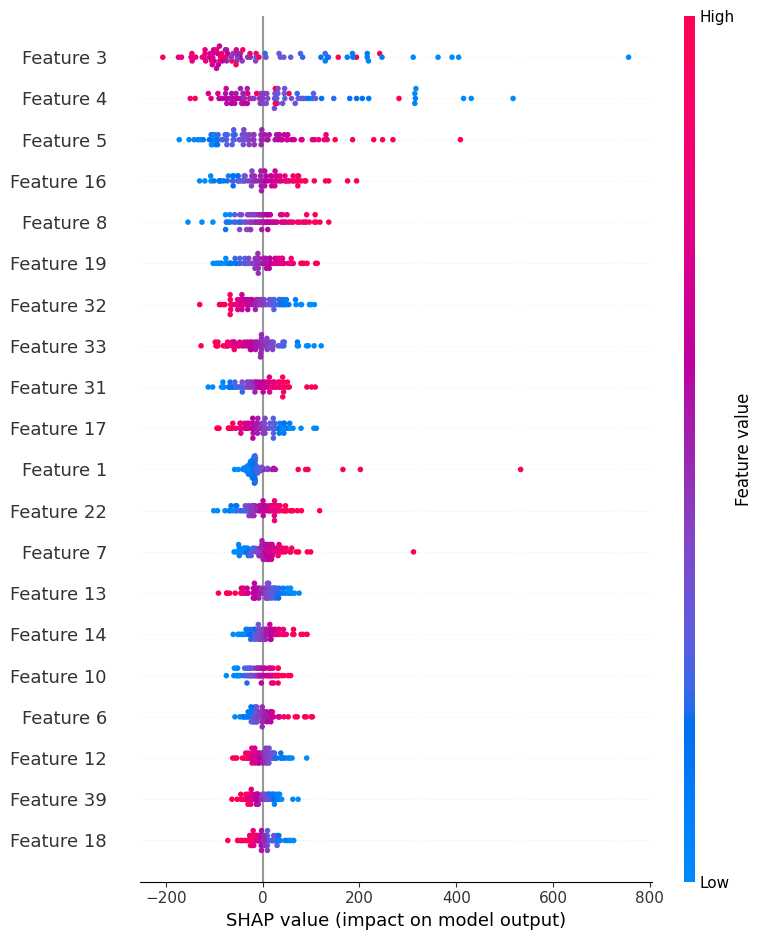

In [121]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=ann_pred.flat, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel("Actual DON Concentration")
plt.ylabel("Predicted DON Concentration")
plt.title("Actual vs. Predicted Values (NN Model)")
plt.show()
# Residual Plot
residuals = y_test - ann_pred.flat
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='r', linestyle='--')  # Zero error line
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution (NN Model)")
plt.show()

# SHAP for feature importance
explainer = shap.Explainer(best_ann_model, X_train)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

### Attention Models

In [172]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner import HyperModel

class AttentionLayer(layers.Layer):
    def __init__(self):
        super(AttentionLayer, self).__init__()

    def call(self, inputs):
        # Compute attention scores
        attention_scores = tf.nn.softmax(tf.matmul(inputs, inputs, transpose_b=True), axis=-1)
        # Apply attention scores to the inputs
        context_vector = tf.matmul(attention_scores, inputs)
        return context_vector

def create_attention_model(hp):
    """Create an attention-based model with hyperparameters."""
    input_dim = X_train.shape[1]  # Use the actual number of features
    inputs = layers.Input(shape=(input_dim,))
    x = layers.Dense(hp.Int('units_1', 64, 256, step=32), activation='relu')(inputs)
    x = layers.Dense(hp.Int('units_2', 32, 128, step=32), activation='relu')(x)
    
    # Apply attention mechanism
    attention_output = AttentionLayer()(x)
    
    # Final output layer
    outputs = layers.Dense(1)(attention_output)
    
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='mean_squared_error', metrics=['mae'])
    return model

In [173]:
from keras_tuner import RandomSearch

def tune_hyperparameters(X_train, y_train):
    """Tune hyperparameters for the attention model."""
    tuner = RandomSearch(
        create_attention_model,
        objective='val_mae',
        max_trials=10,
        executions_per_trial=1,
        directory='tuner_results',
        project_name='attention_model_tuning'
    )

    # Split the training data for validation
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Search for the best hyperparameters
    tuner.search(X_train_split, y_train_split, epochs=50, validation_data=(X_val_split, y_val_split))

    # Get the best model and hyperparameters
    best_model = tuner.get_best_models(num_models=1)[0]
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

    print("Best Hyperparameters:")
    print(best_hyperparameters.values)

    return best_model

In [174]:
best_model = tune_hyperparameters(X_train, y_train)

# Evaluate the best model
loss, mae = best_model.evaluate(X_test, y_test)
print(f'Best Model - Loss: {loss}, MAE: {mae}')

Trial 10 Complete [00h 00m 02s]
val_mae: 465.18939208984375

Best val_mae So Far: 461.258056640625
Total elapsed time: 00h 03m 18s


Best Hyperparameters:
{'input_dim': 76, 'units_1': 160, 'units_2': 64, 'learning_rate': 0.001}
3/3 [==============================] - 0s 2ms/step - loss: 460601.7188 - mae: 435.6483
Best Model - Loss: 460601.71875, MAE: 435.6482849121094


3/3 [==============================] - 0s 2ms/step


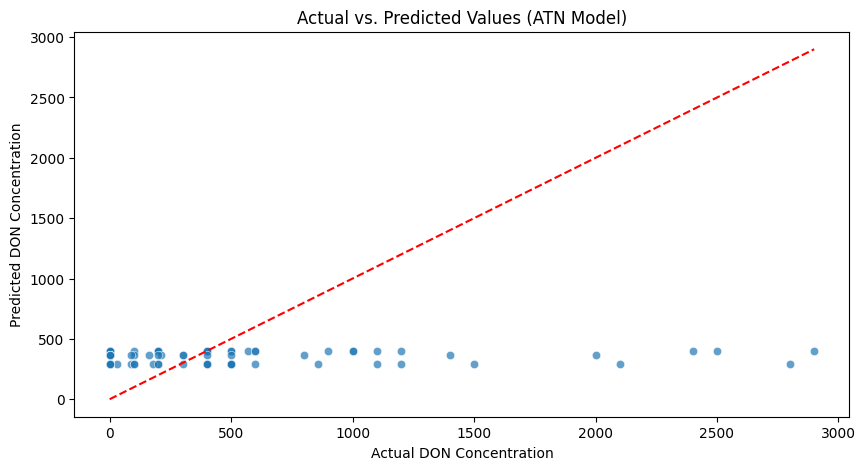

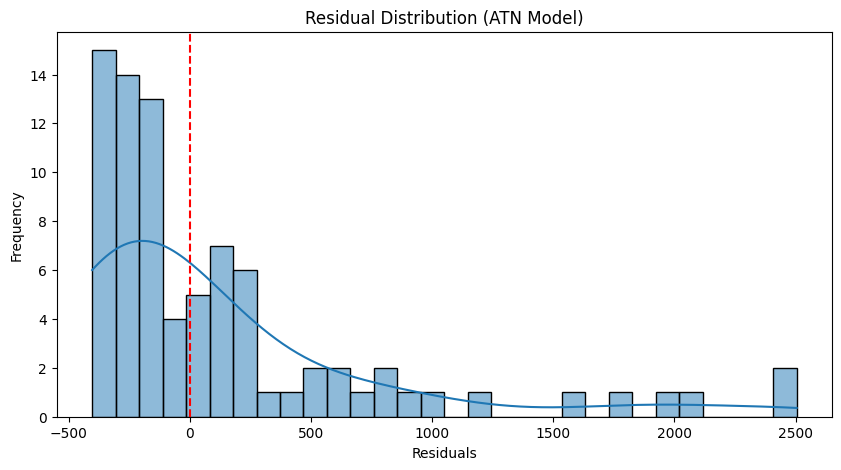

PermutationExplainer explainer: 83it [02:27,  1.94s/it]                        


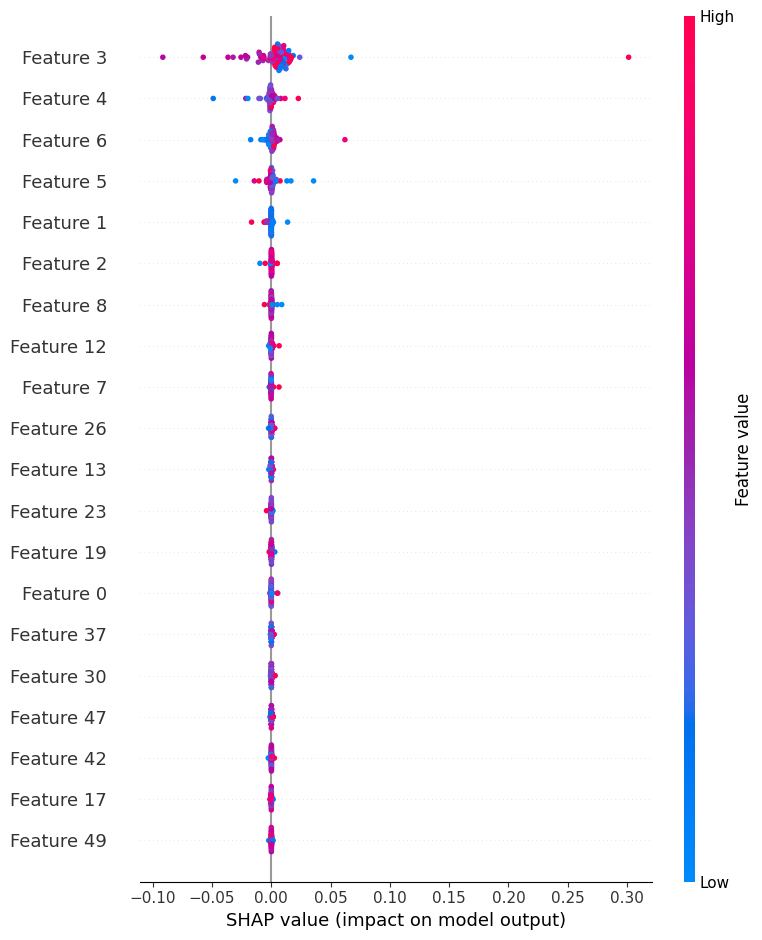

In [175]:
# Predictions
atn_pred = best_model.predict(X_test)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=atn_pred.flat, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel("Actual DON Concentration")
plt.ylabel("Predicted DON Concentration")
plt.title("Actual vs. Predicted Values (ATN Model)")
plt.show()
# Residual Plot
residuals = y_test - atn_pred.flat
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='r', linestyle='--')  # Zero error line
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution (ATN Model)")
plt.show()

# SHAP for feature importance
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)